# Ground-based solar irradiance data

Conducted ground-based solar irradiance measurements is useful for obtaining information on the local solar resource, but also extremely for determining the accuracy of sattelite and reanalysis solar irradiance methods and validating solar radiation models.

In this section, the major ground-based solar radiation monitoring network will be introduced and it will be demonstrated how data can be obtained from these sources.


***
<div style="text-align: right"> <i>Content by Adam R. Jensen</i> </div>

## Major radiation station networks

There exists a number of ground-based solar radiation monitoring networks, of which most are operated by national weather services or research organizations:

* [Baseline Surface Radiation Network - BSRN (global)](https://bsrn.awi.de/)
* [SURFRAD by NOAA (US)](https://www.esrl.noaa.gov/gmd/grad/surfrad/)
* [SOLRAD by NOAA (US)](https://www.esrl.noaa.gov/gmd/grad/solrad/)
* [ESMAP - World Bank ](https://globalsolaratlas.info/solar-measurement)
* [SRML by the University of Oregon (Northwestern US)](http://solardat.uoregon.edu/index.html)
* [NREL (US)](https://midcdmz.nrel.gov/)
* Enermena
* SMHI (Sweden)
* BoM (Australia)
* SAURAN (South Africa)
* MeteoSwiss (Switzerland)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

## Baseline Surface Radiation Network (BSRN)

Of the monitoring networks listed above, the Baseline Surface Radiation Network (BSRN) stands out, as the only monitoring network with global coverage. 


In [2]:
bsrn_url = 'https://wiki.pangaea.de/wiki/BSRN#Sortable_Table_of_Stations'
bsrn_stations = pd.read_html(bsrn_url, index_col=1)[0]
bsrn_stations

,Station full name,Location,Latitude,Longitude,Elevation,First dataset in archive,Upward fluxes (in LR),Surface type,Topography type,Rural/Urban II,Comment
Abbreviation,,,,,,,,,,,
ALE,Alert,"Canada, Lincoln Sea",82.4900,-62.4200,127.0,2004-08-16,LR0300,tundra,hilly,rural,Closed
ASP,Alice Springs,"Australia, Northern Territory",-23.7980,133.8880,547.0,1995-01-01,NaN,grass,flat,rural,NaN
BAR,Barrow,"USA , Alaska",71.3230,-156.6070,8.0,1992-01-01,LR0300,tundra,flat,rural,NaN
BER,Bermuda,"USA, Bermuda",32.2670,-64.6670,8.0,1992-01-01,NaN,"water, ocean",flat,rural,NaN
BIL,Billings,"USA, Oklahoma",36.6050,-97.5160,317.0,1993-06-01,NaN,grass,flat,rural,NaN
BON,Bondville,"USA, Illinois",40.0667,-88.3667,213.0,1995-01-01,LR3010,grass,flat,rural,NaN
BOS,Boulder,"USA, Colorado",40.1250,-105.2370,1689.0,1995-07-01,LR3010,grass,hilly,rural,NaN
BOU,Boulder,"USA, Colorado",40.0500,-105.0070,1577.0,1992-01-01,LR3300,grass,flat,rural,Closed in July 2016
BRB,Brasilia,"Brazil, Brasilia City",-15.6010,-47.7130,1023.0,2006-02-01,NaN,"concrete, since 2015: shrub",flat,rural,NaN


To visualize the geographical coverage of the BSRN, it is helpful to plot the stations on map. This can easily be achieved using the Folium library in Python, which generates an interactive map. This is especially useful when trying to locate the nearest BSRN station to a point of interest or get an overview of the coverage in a particular region.

In [3]:
import folium

# Initialize Folium map
m = folium.Map(
    location=[0, 15],
    zoom_start=1,
    min_zoom=1,
    max_bounds=True,
    tiles='openstreetmap',
    )

# Add each station to the map
for index, row in bsrn_stations.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station full name']} ({row.name})",
        icon=folium.Icon(color='blue')
    ).add_to(m)

m  # Show the map

The distribution of the BSRN stations is clearly shown in the map above, with some regions having a high concentration of stations (e.g., Europe) and other regions with no stations (e.g., East Africa and most of Russia). Note also that the BSRN includes four stations on Antarctica.

## SURFRAD and SOLRAD

The SURFRAD and SOLRAD are two monitoring networks in the United States operated by the National Oceanic and Atmospheric Administration (NOAA). 

In [4]:
def convert_latitude_longitude(l):
    """Function to convert from latitude/longitude string
    to float with sign convention of ISO 19115"""
    l = l.replace(' ', '')  # Remove all spaces
    cardinal_signs = {'N': 1, 'S': -1, 'E': 1, 'W': -1}
    for c in cardinal_signs.keys():
        if c in l:
            return cardinal_signs[c]*float(l.replace(c, '').replace('°', ''))

In [5]:
surfrad_url = 'https://www.esrl.noaa.gov/gmd/grad/surfrad/sitepage.html'
surfrad_stations = pd.read_html(surfrad_url, index_col=0)[0].iloc[:-1]
surfrad_stations[['Latitude', 'Longitude']] = surfrad_stations[['Latitude', 'Longitude']].applymap(convert_latitude_longitude)
surfrad_stations

,Name,Latitude,Longitude,Elevation,Time Zone,Installed
Code,,,,,,
BND*,"Bondville, Illinois",40.05192,-88.37309,230 m,6 hours from UTC,April 1994
TBL,"Table Mountain, Boulder, Colorado",40.12498,-105.23680,1689 m,7 hours from UTC,July 1995
DRA,"Desert Rock, Nevada",36.62373,-116.01947,1007 m,8 hours from UTC,March 1998
FPK,"Fort Peck, Montana",48.30783,-105.10170,634 m,7 hours from UTC,November 1994
GWN,"Goodwin Creek, Mississippi",34.25470,-89.87290,98 m,6 hours from UTC,December 1994
PSU,"Penn. State Univ., Pennsylvania",40.72012,-77.93085,376 m,5 hours from UTC,June 1998
SXF,"Sioux Falls, South Dakota",43.73403,-96.62328,473 m,6 hours from UTC,June 2003
SGP,"ARM Southern Great Plains Facility, Oklahoma",36.60406,-97.48525,314 m,6 hours from UTC,NaN


In [6]:
solrad_url = 'https://www.esrl.noaa.gov/gmd/grad/solrad/solradsites.html'
solrad_stations = pd.read_html(solrad_url, index_col=0)[0]
solrad_stations.loc['STE',['Name','Latitude','Longitude']] = ['Sterling, Virginia', '38.97203° N', '77.48690° W']
solrad_stations[['Latitude', 'Longitude']] = \
    solrad_stations[['Latitude', 'Longitude']].applymap(convert_latitude_longitude)
solrad_stations

,Name,Latitude,Longitude,Elevation
Code,,,,
ABQ,"Albuquerque, New Mexico",35.03796,-106.62211,1617 m
BIS,"Bismarck, North Dakota",46.77179,-100.75955,503 m
HNX,"Hanford, California",36.31357,-119.63164,73 m
MSN,"Madison, Wisconsin",43.07250,-89.41133,271 m
ORT,"Oak Ridge, Tennessee",35.96101,-84.28838,334 m
SLC,"Salt Lake City, Utah",40.77220,-111.95495,1288 m
SEA,"Seattle, Washington",47.68685,-122.25667,20 m
STE,"Sterling, Virginia",38.97203,-77.48690,85 m
TLH,"Tallahassee, Florida",30.39675,-84.32955,18 m


In [7]:
### Initialize Folium map
m = folium.Map(
    location=[40, -95],
    zoom_start=4,
    min_zoom=2,
    max_bounds=True,
    tiles='OpenStreetMap',
)

# Add stations to the map
for i, stations in enumerate([surfrad_stations, solrad_stations]):
    for index, row in stations.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['Name']} ({row.name})",
            icon=folium.Icon(color=['blue', 'red'][i])
            ).add_to(m)

# Add Category Legend
legend_html = """
<div style="position:fixed;
     bottom: 50px; 
     left: 50px; 
     width: 120px; 
     height: 105px; 
     border:2px solid grey; 
     z-index: 9999;
     font-size:14px;">
     &nbsp;<b>Station network:</b><br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:blue"></i>&nbsp;SURFRAD<br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:red"></i>&nbsp;SOLRAD<br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:orange"></i>&nbsp;SRML<br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:green"></i>&nbsp;NREL<br>
</div>"""

m.get_root().html.add_child(folium.Element(legend_html))  # Add Legend

m.add_child(folium.LatLngPopup())  # Show latitude,longitude when clicking
m  # Show map

## University of Oregon - Solar Radiation Monitoring Laboratory (SRML)

The Solar Radiation Monitoring Laboratory (SRML) operates a network of station in the Northwestern United States. 

The following code cell will show how pvlib-python can be used to retrieve measured solar radiation data form the SRML network. The specific example extracts data from the Hermiston station for the month of June 2020. The *read_srml_month_from_solardat* function extracts data from the SRML archive, which stores data in monthly files for each station. A list of the station abbreviation can be found [here](http://solardat.uoregon.edu/StationIDCodes.html).

In [8]:
import pvlib
df = pvlib.iotools.read_srml_month_from_solardat(station='HE', year=2020, month=6)
df.head()

,ghi_0,ghi_0_flag,dni_0,dni_0_flag,dhi_3,dhi_3_flag,ghi_2,ghi_2_flag,dni_2,dni_2_flag,...,relative_humidity_1,relative_humidity_1_flag,9151,9151_flag,wind_dir_1,wind_dir_1_flag,wind_speed_1,wind_speed_1_flag,dhi_0,dhi_0_flag
2020-06-01 00:00:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.3,12,0.0,11,172.5,11,1.3,12,0,71
2020-06-01 00:01:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.5,12,0.0,11,180.7,11,1.3,12,0,71
2020-06-01 00:02:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.6,12,0.0,11,128.9,11,0.4,12,0,71
2020-06-01 00:03:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.4,12,0.0,11,141.6,11,1.2,12,0,71
2020-06-01 00:04:00-08:00,0,12,0,12,0,12,0,12,0,12,...,55.6,12,0.0,11,186.3,11,0.8,12,0,71


The output above shows the first five rows of the extracted data. We can now plot the parameters of interest, e.g., the three components of solar radiation; GHI, DNI, and DHI.

Text(0, 0.5, 'DHI [W/m$^2$]')

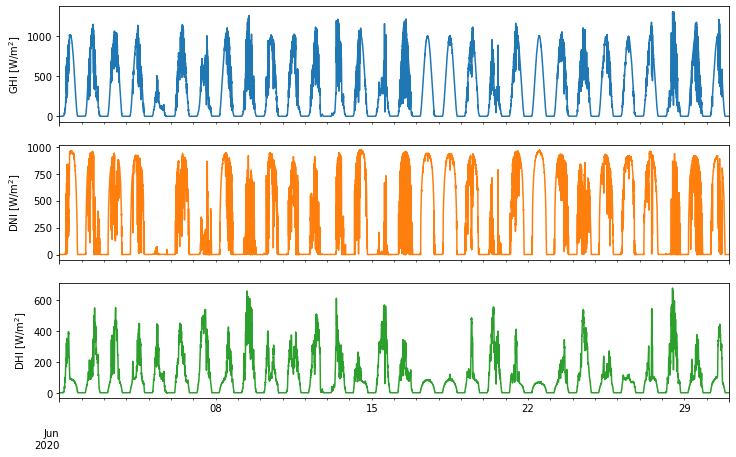

In [9]:
axes = df[['ghi_0', 'dni_0', 'dhi_3']].plot(subplots=True, figsize=(12,8), sharex=True, rot=0, legend=False)
axes[0].set_ylabel('GHI [W/m$^2$]')
axes[1].set_ylabel('DNI [W/m$^2$]')
axes[2].set_ylabel('DHI [W/m$^2$]')

## Future updates
Future updates to the this document will include the stations from the NREL and SRML networks.